In [47]:
%pylab inline
import tradingWithPython as twp
import tradingWithPython.lib.yahooFinance as yf
import matplotlib
import pandas as pd
import numpy as np
twp.extra.setNotebookStyle()

Populating the interactive namespace from numpy and matplotlib


C:\Users\User\Anaconda2\envs\py35\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['grid']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Got 6022 days of data


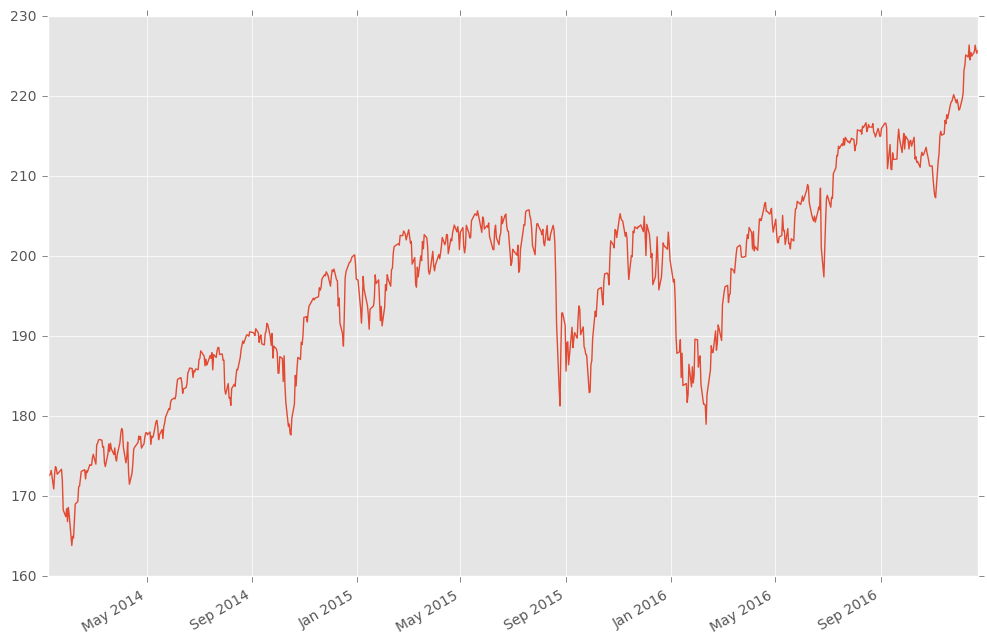

In [9]:
histd_spy = yf.getHistoricData('spy')['adj_close'][-750:]
histd_spy.plot()

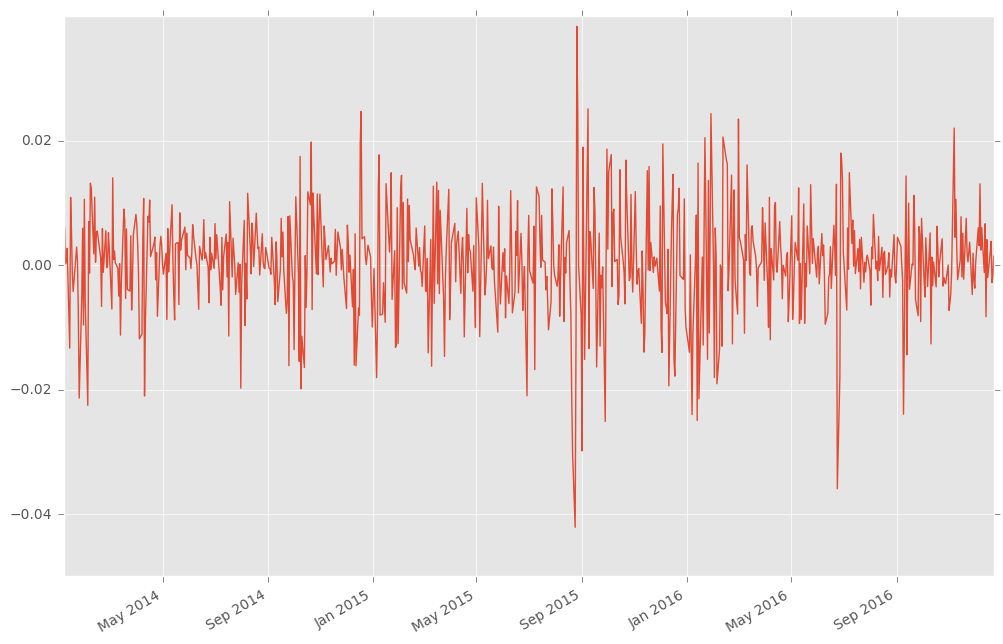

In [11]:
daily_returns = histd_spy.pct_change()
daily_returns.plot()

In [15]:
sharp_r = daily_returns.mean() / daily_returns.std()
sharp_r_anulzd = sqrt(250) * sharp_r
print('sharp ration of spy:', sharp_r_anulzd)

sharp ration of spy: 0.753829300697


In [16]:
print('another approach to calculate s/r with twp:', twp.sharpe(daily_returns))

another approach to calculate s/r with twp: 0.753829300697


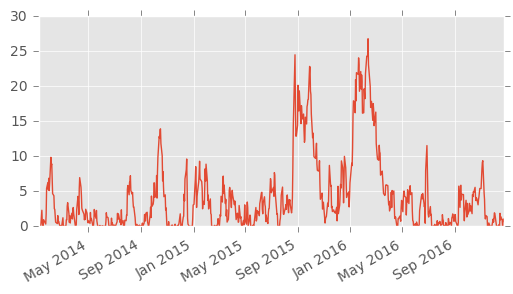

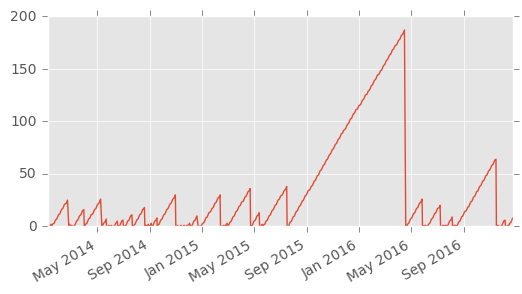

In [26]:
drawdown, duration = twp.drawdown(histd_spy)
drawdown.plot(figsize=(6,3))
figure()
duration.plot(figsize=(6,3))

In [27]:
drawdown.max()

26.803671000000008

In [28]:
duration.max()

187.0

In [29]:
twp.profitRatio(daily_returns)

4.0503533452348854

Got 4021 days of data


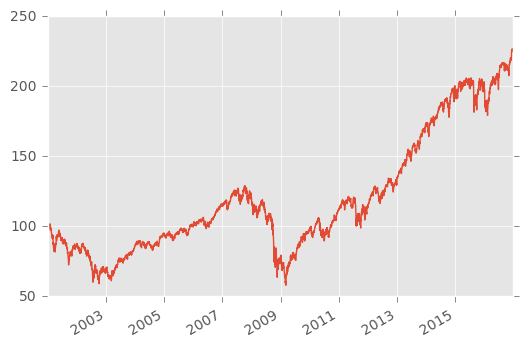

In [38]:
symbol = 'spy'
price = yf.getHistoricData(symbol, sDate=(2001,1,1))['adj_close']
price.plot(figsize=(6, 4))

In [41]:
train = price[:-500] #split data set, first 500 datas for training

In [48]:
mSlow = pd.rolling_mean(train, 50)
mFast = pd.rolling_mean(train, 10)
grid=True

C:\Users\User\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
  if __name__ == '__main__':
C:\Users\User\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  from ipykernel import kernelapp as app


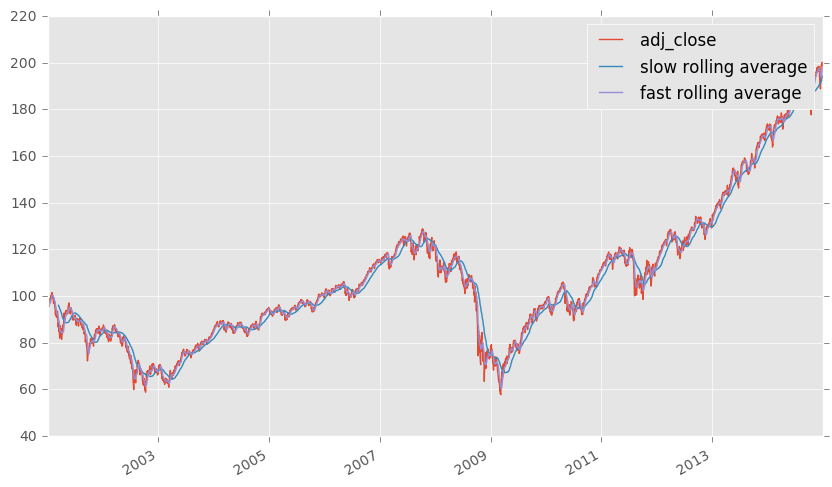

In [53]:
figsize(10, 6)
train.plot()
mSlow.plot(label='slow rolling average')
mFast.plot(label='fast rolling average')
legend()

In [56]:
pos = pd.Series(index=train.index, data=0 ) #set igual date index and default value of the series 0

In [59]:
pos[mFast>mSlow] = 10 # position with 10 share when mFast is higher than mSlow 括号中的部分是用条件得出一个时间序列index。两个序列只要index一样就可以。 
pos[mSlow>mFast] = -10

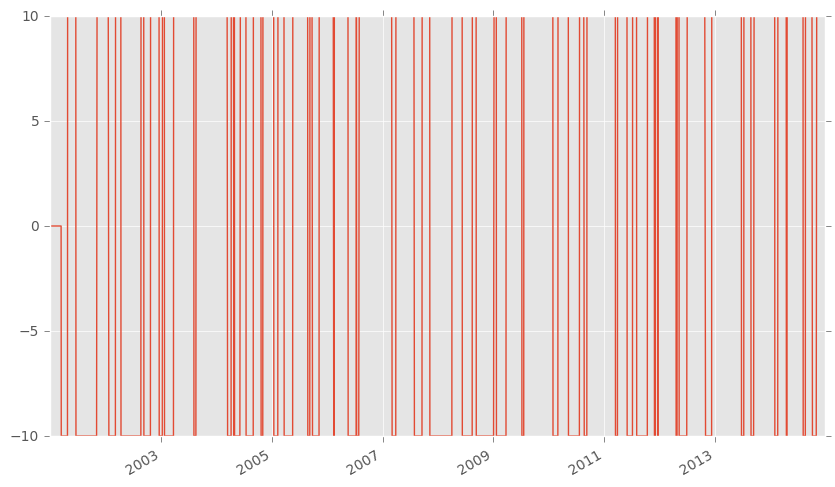

In [58]:
pos.plot()

In [64]:
pnl = twp.pos2pnl(train, pos) #use pos2pnl function to show account balance
pnl[101:120]

,cash,stock,tc,total
2001-05-29,-951.12,936.92,0.0,-14.20
2001-05-30,-951.12,923.79,0.0,-27.32
2001-05-31,-951.12,928.59,0.0,-22.53
2001-06-01,-951.12,934.34,0.0,-16.78
2001-06-04,-951.12,938.84,0.0,-12.28
...,...,...,...,...
2001-06-18,-951.12,896.55,0.0,-54.57
2001-06-19,849.82,-900.47,0.0,-50.65
2001-06-20,849.82,-905.20,0.0,-55.38
2001-06-21,849.82,-915.48,0.0,-65.66


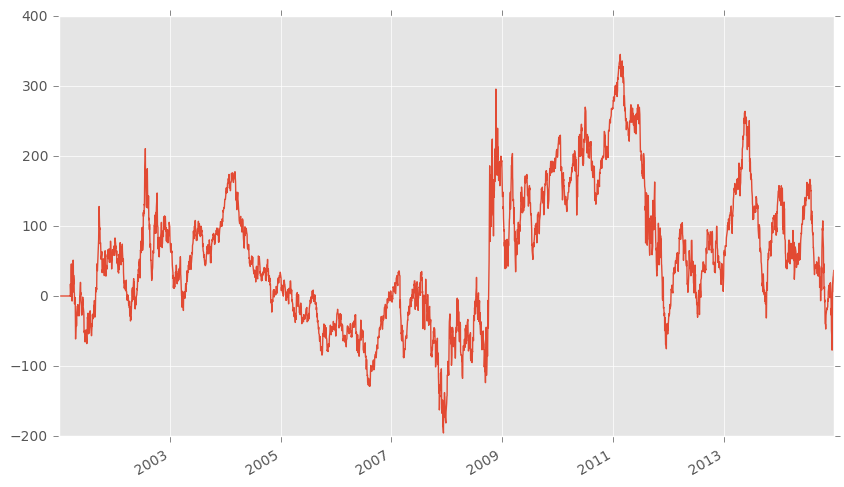

In [66]:
pnl['total'].plot()

In [98]:
#write a strategy function
def maCrosserStrategy(price, fastPeriod=10, slowPeriod=20, shares=10):
    maSlow =pd.rolling_mean(price, slowPeriod)
    maFast =pd.rolling_mean(price, fastPeriod)
    pos = pd.Series(index=price.index, data=0)
    pos[maSlow>maFast] = -shares
    pos[maSlow<=maFast] = shares
    return twp.pos2pnl(price, pos)['total']

C:\Users\User\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
  app.launch_new_instance()
C:\Users\User\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()


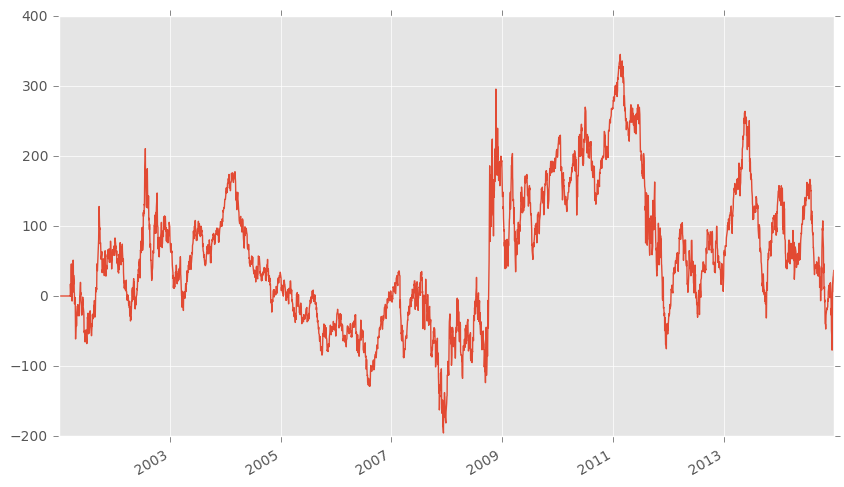

In [74]:
pnl = maCrosserStrategy(train, 10, 50 )
pnl.plot()

In [81]:
fastPeriod = arange(1, 20, 1)
slowPeriod = arange(20, 200, 5)
SH = np.zeros((len(fastPeriod), len(slowPeriod)))

In [84]:
from tradingWithPython.lib.extra import ProgressBar
pBar = ProgressBar(len(fastPeriod)-1) #进度条

In [92]:
from tradingWithPython.lib.extra import ProgressBar
pBar = ProgressBar(len(fastPeriod)-1) #进度条

for i, f in enumerate(fastPeriod):
    pBar.animate(i)
    for j, s in enumerate(slowPeriod):
        pnl = maCrosserStrategy(train, fastPeriod=f, slowPeriod=s)
        SH[i, j] = twp.sharpe(pnl.diff()) #pnl本身就是账户的总资产，一阶导就是资产变化率

        

 [                       0%                       ]

C:\Users\User\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  app.launch_new_instance()
C:\Users\User\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=1,center=False).mean()
C:\Users\User\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=25,center=False).mean()
  app.launch_new_instance()
C:\Users\User\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
  app

 [***                    6%                       ]  1 of 18 complete

C:\Users\User\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=185,center=False).mean()
  app.launch_new_instance()
C:\Users\User\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=190,center=False).mean()
  app.launch_new_instance()
C:\Users\User\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=195,center=False).mean()
  app.launch_new_instance()
C:\Users\User\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(wind

 [********              17%                       ]  3 of 18 complete

C:\Users\User\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=3,center=False).mean()
C:\Users\User\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=4,center=False).mean()


 [*************         28%                       ]  5 of 18 complete

C:\Users\User\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
C:\Users\User\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=6,center=False).mean()


 [*******************   39%                       ]  7 of 18 complete

C:\Users\User\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=7,center=False).mean()
C:\Users\User\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=8,center=False).mean()


 [********************* 44%                       ]  8 of 18 complete

C:\Users\User\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=9,center=False).mean()


 [**********************56%**                     ]  10 of 18 complete

C:\Users\User\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
C:\Users\User\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=11,center=False).mean()


 [**********************67%*******                ]  12 of 18 complete

C:\Users\User\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\User\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=13,center=False).mean()


 [**********************78%************           ]  14 of 18 complete

C:\Users\User\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=14,center=False).mean()
C:\Users\User\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=15,center=False).mean()


 [**********************89%******************     ]  16 of 18 complete

C:\Users\User\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=16,center=False).mean()
C:\Users\User\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=17,center=False).mean()


 [*********************100%***********************]  18 of 18 complete

C:\Users\User\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=18,center=False).mean()
C:\Users\User\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=19,center=False).mean()


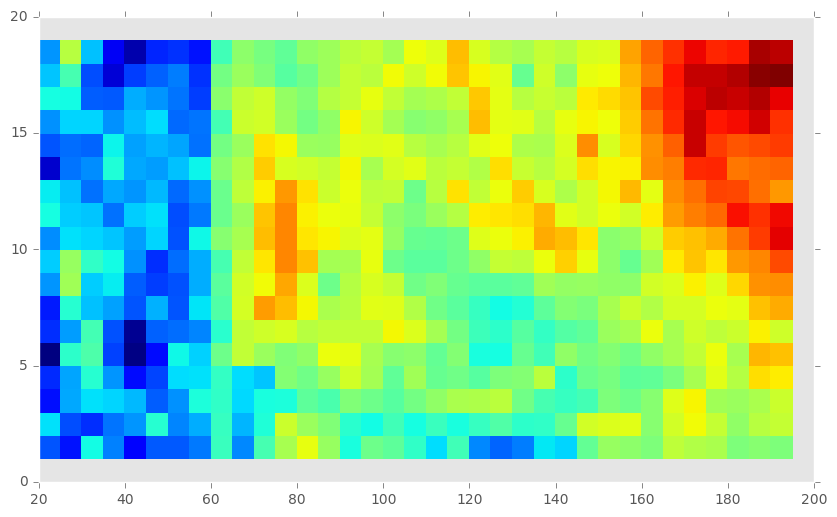

In [93]:
pcolor(slowPeriod, fastPeriod, SH)

In [96]:
i, j = np.unravel_index(SH.argmax(), SH.shape) #numpy自带函数，寻最大值的index
print('Maximum sharpe: %.2f' % SH[i,j])
print('Optimum fastPeriod %i' % fastPeriod[i])
print('Optimum slowPeriod %i' % slowPeriod[j])

Maximum sharpe: 0.64
Optimum fastPeriod 17
Optimum slowPeriod 190


C:\Users\User\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=190,center=False).mean()
  app.launch_new_instance()
C:\Users\User\Anaconda2\envs\py35\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=17,center=False).mean()


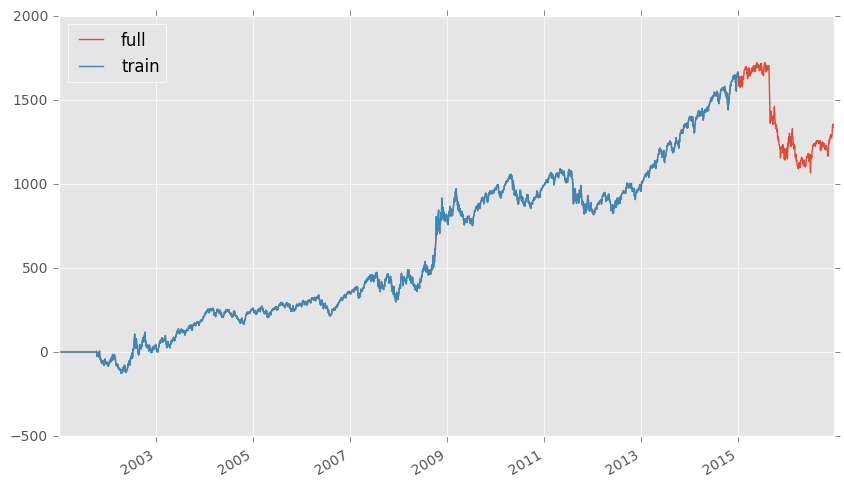

In [100]:
df = pd.DataFrame(index = price.index)
df['full'] = maCrosserStrategy(price,fastPeriod[i],slowPeriod[j]) #using the optimized index, plot overall period
df['train'] = maCrosserStrategy(train,fastPeriod[i],slowPeriod[j])
df.plot()